# **TikTok Project**


Exploratory data analysis**


**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

# **Visualize a story in Tableau and Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**



*   What methods are best for identifying outliers?
  * Use numpy functions to investigate the `mean()` and `median()` of the data and understand range of data values
  * Use a boxplot to visualize the distribution of the data
*   How do you make the decision to keep or exclude outliers from any future models?
  * There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. Whether you keep outliers as they are, delete them, or reassign values is a decision that you make on a dataset-by-dataset basis, according to what your goals are for the model you are planning to construct. To help you make the decision, you can start with these general guidelines:

      * Delete them: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.
      * Reassign them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
      * Leave them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.



In [2]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code.

In [3]:
# Display and examine the first few rows of the dataframe
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get the size of the data
data.size

232584

In [5]:
# Get the shape of the data
data.shape

(19382, 12)

In [6]:
# Get basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
# Generate a table of descriptive statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [8]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [10]:
data.dropna(axis = 0 , inplace = True)

In [11]:
data.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

### **Task 2b. Assess data types**

In [5]:
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

### **Task 2c. Select visualization type(s)**

The visualizations most helpful for considering the distribution of the data include box plots and histograms. Visualizing the distribution of the data can inform the next steps and considerations in data analysis. For example, data distribution will inform which types of modeling is needed.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**



### **Task 3. Build visualizations**



#### **video_duration_sec**



Text(0.5, 1.0, 'Box Plot of Video Duration in Seconds')

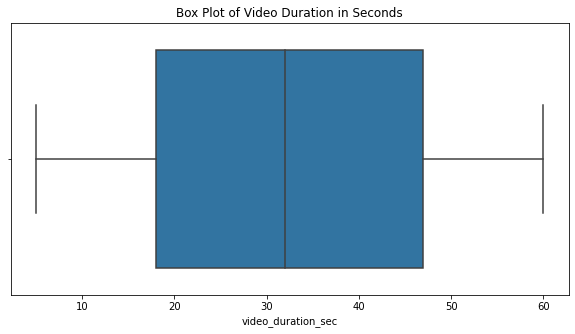

In [9]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='video_duration_sec', fliersize=1)
plt.title('Box Plot of Video Duration in Seconds')


Text(0.5, 1.0, 'Histogram of Video Duration in Second')

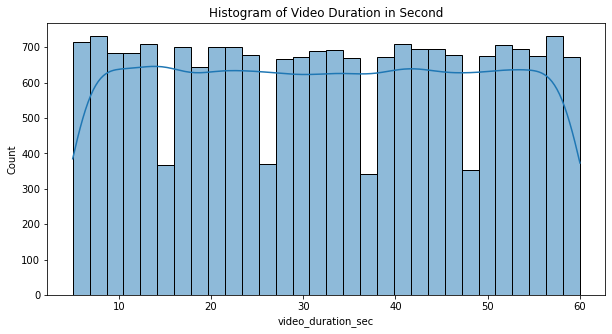

In [10]:
# Create a histogram
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='video_duration_sec', bins=30, kde=True)
plt.title('Histogram of Video Duration in Second')

Videos are 5 to 60 seconds long with a generally uniform distribution of video duration (with slightly more videos edging towards the 60 second limit).

#### **video_view_count**



Text(0.5, 1.0, 'Boxplot of Video View Count')

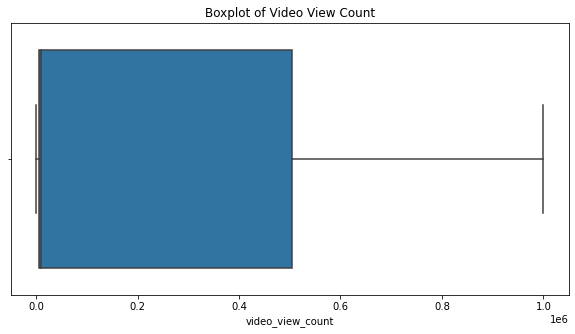

In [11]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='video_view_count', fliersize=1)
plt.title('Boxplot of Video View Count')


Text(0.5, 1.0, 'Histogram of Video View Count')

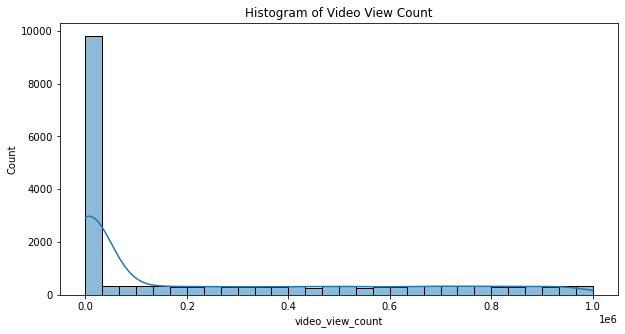

In [12]:
# Create a histogram
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='video_view_count', bins=30, kde=True)
plt.title('Histogram of Video View Count')

This variable has a very uneven distribution, with more than half the videos receiving fewer than 100,000 views. Distribution of view counts > 100,000 views is uniform.

#### **video_like_count**


Text(0.5, 1.0, 'Boxplot of Video Like Count')

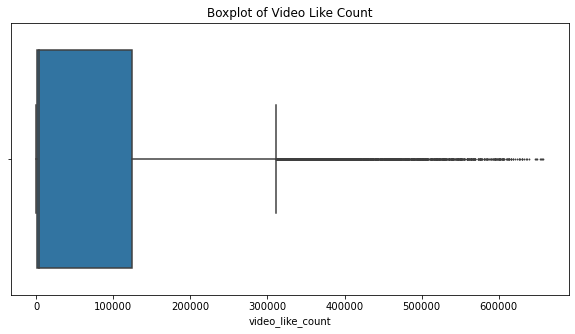

In [13]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='video_like_count', fliersize=1)
plt.title('Boxplot of Video Like Count')


Text(0.5, 1.0, 'Histogram of Video Like Count')

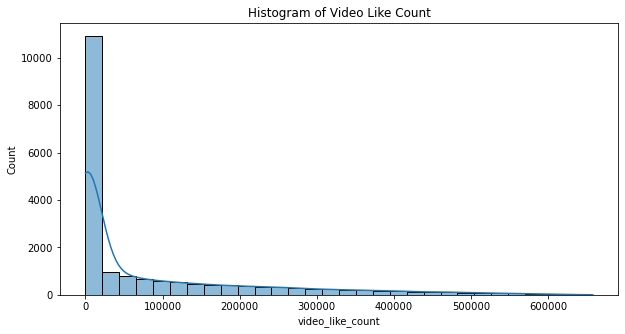

In [14]:
# Create a histogram
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='video_like_count', bins=30, kde=True)
plt.title('Histogram of Video Like Count')

Similar to view count, there are far more videos with < 100,000 likes than there are videos with more. However, in this case, there is more of a taper, as the data skews right, with many videos at the upper extremity of like count.

#### **video_comment_count**


Text(0.5, 1.0, 'Boxplot of Video Comment Count')

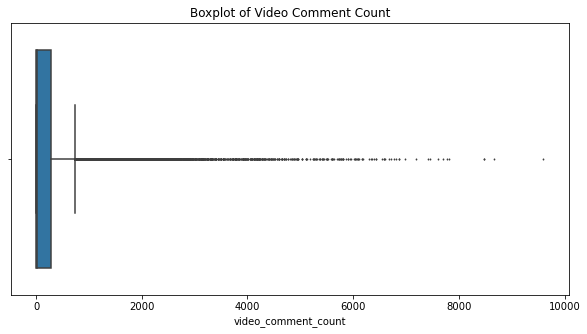

In [15]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='video_comment_count', fliersize=1)
plt.title('Boxplot of Video Comment Count')


Text(0.5, 1.0, 'Histogram of Video Comment Count')

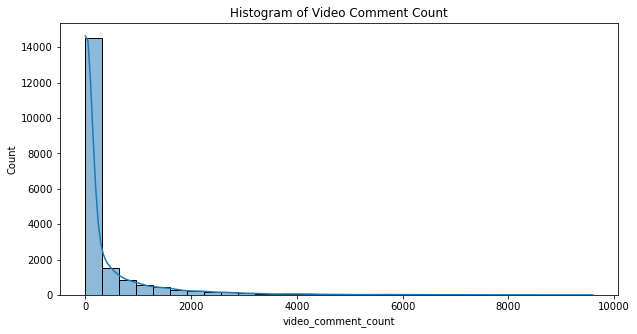

In [16]:
# Create a histogram
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='video_comment_count', bins=30, kde=True)
plt.title('Histogram of Video Comment Count')


The vast majority of videos are grouped at the bottom of the range of values for video comment count. Most videos have fewer than 100 comments. The distribution is very right-skewed.

#### **video_share_count**


Text(0.5, 1.0, 'Boxplot of Video Share Count')

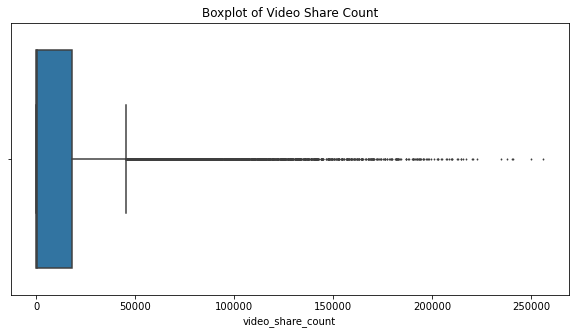

In [17]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='video_share_count', fliersize=1)
plt.title('Boxplot of Video Share Count')


Text(0.5, 1.0, 'Histogram of Video Share Count')

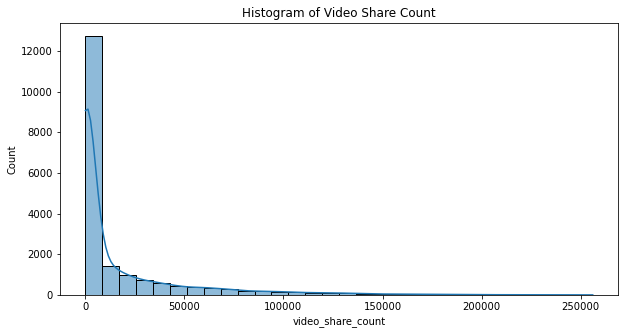

In [18]:
# Create a histogram
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='video_share_count', bins=30, kde=True)
plt.title('Histogram of Video Share Count')



The majority of videos had fewer than 10,000 shares. The distribution is very skewed to the right.

#### **video_download_count**


Text(0.5, 1.0, 'Boxplot of Video Download Count')

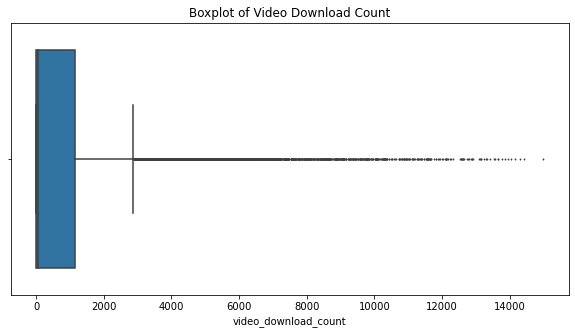

In [19]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='video_download_count', fliersize=1)
plt.title('Boxplot of Video Download Count')


Text(0.5, 1.0, 'Histogram of Video Download Count')

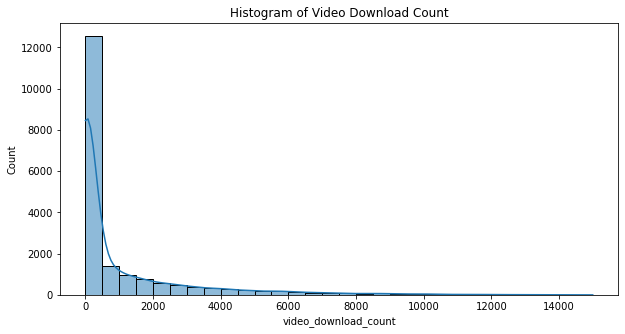

In [20]:
# Create a histogram
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='video_download_count', bins=30, kde=True)
plt.title('Histogram of Video Download Count')



The majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times. Again, the data is very skewed to the right.

#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

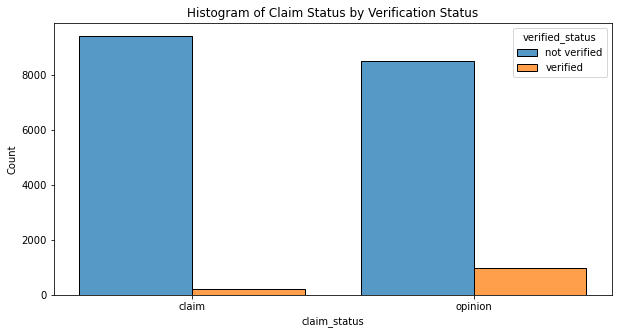

In [21]:
# Create a histogram
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='claim_status', hue = "verified_status",
             multiple = "dodge",
             shrink = 0.8, bins=30,)
plt.title('Histogram of Claim Status by Verification Status')
plt.show()


It is clear that there are far fewer "verified" users than "not verified" ones, but if a user is verified, they are much more likely to post opinions.

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

In [22]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


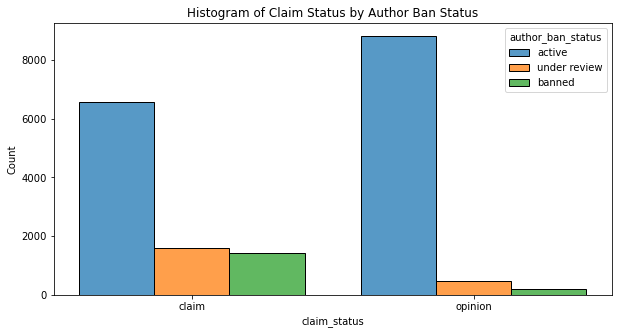

In [25]:
# Create a histogram
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='claim_status', hue = "author_ban_status", hue_order=['active', 'under review', 'banned'],
             multiple = "dodge",
             shrink = 0.8, bins=30,)
plt.title('Histogram of Claim Status by Author Ban Status')
plt.show()



Active authors is far greater for videos classified as "opinion" than for videos classified as "claim". 
Videos classified as "claim" are more likely to come "under review" or violate the terms of service and be "banned".

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

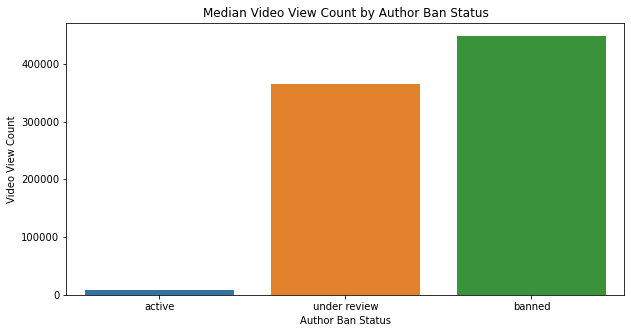

In [32]:
# Create a bar plot
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='author_ban_status', y = "video_view_count", 
            order=['active', 'under review', 'banned'],
            estimator=np.median, ci=None)

# Add labels and title
plt.xlabel('Author Ban Status')
plt.ylabel('Video View Count')
plt.title('Median Video View Count by Author Ban Status')
plt.show()


Median view counts for authors that are "banned" or "under review" are much higher than those for authors that are "active".

In [33]:
# Calculate the median view count for claim status.
data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

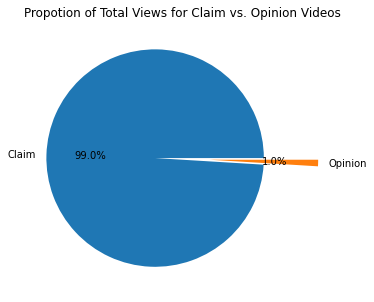

In [46]:
# Create a pie graph
plt.figure(figsize=(10,5))
plt.pie(x=data.groupby('claim_status')['video_view_count'].sum(),explode=[0.25,0.25], labels=['Claim', 'Opinion'], autopct='%1.1f%%')
plt.title('Propotion of Total Views for Claim vs. Opinion Videos')
plt.show()


Overall view counts for videos that are classified as "claim" are 99% than videos that are classified as "opinion" 


### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [47]:
# Determine how many data points in the data set could be considered outliers
# A common way to determine outliers in a normal distribution is through
# the interquartile ranges

cols = ["video_view_count", "video_like_count", "video_share_count",
       "video_download_count", "video_comment_count"]

for col in cols:
    
    percentile_25 = data[col].quantile(0.25)  # 25th percentile
    percentile_75 = data[col].quantile(0.75)  # 75th percentile
    iqr = percentile_75 - percentile_25  # calculate IQR
    
    col_med = data[col].median()  # median of column
    
    threshold = col_med + (1.5 * iqr)  # outlier threshold (upper only)
    
    count_sum = (data[col] > threshold).sum()  # mask + sum Boolean mask
    
    print("Number of outliers in", col, ":", count_sum)


Number of outliers in video_view_count : 2343
Number of outliers in video_like_count : 3468
Number of outliers in video_share_count : 3732
Number of outliers in video_download_count : 3733
Number of outliers in video_comment_count : 3882


#### **Scatterplot**

Text(0.5, 1.0, 'Video Like Count vs Video View Count')

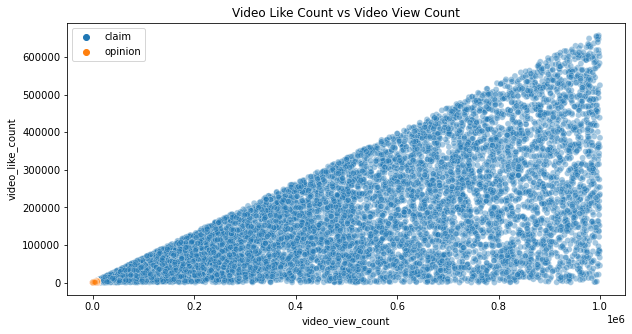

In [51]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
fig, ax = plt.subplots(1, figsize=(10,5))
sns.scatterplot(data=data, x='video_view_count', y='video_like_count', hue='claim_status', alpha=0.4)
ax.legend()
ax.set_title('Video Like Count vs Video View Count according "Claim Status"')


Text(0.5, 1.0, 'Video Like Count vs Video View Count according "Opinions"')

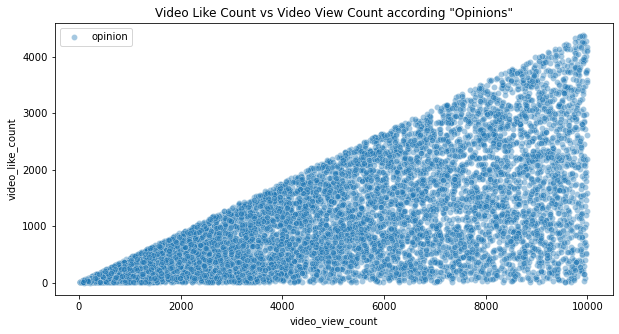

In [63]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
fig, ax = plt.subplots(1, figsize=(10,5))
sns.scatterplot(data=data[data['claim_status']=='opinion'], 
                x='video_view_count', y='video_like_count', alpha=0.4)
ax.legend(labels=['opinion'])
ax.set_title('Video Like Count vs Video View Count according "Opinions"')



The dataset has almost 20,000 entries with 12 attributes. 
Most of the attributes are numerical, however, four of them are categorical. 
When looking at claim_status, the class balance is balanced, which will make future modeling simpler (assuming missing entries and outliers that may be removed to not disrupt this balance). 

Visualizations of data distributions highlight the fact that many of the variables tracking video views, likes, comments, shares, and downloads are highly skewed. This reflects the nature of social media where most content only reaches a small range of people but a few "viral" videos garner a much greater audience. 

Interestingly, videos that are classified as "claim" appear to receive many more views and likes than videos classified as "opinion". 

Upon closer inspection, it also appears that users who post videos classified as "claim" are more likely to come "under review" or violate the terms of service and be "banned". 

However, video engagement appears to be tied more to claim_status rather than author_ban_status as videos classified as "claim" receive more views, likes, and comments regardless of author_ban_status.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**


### **Task 5a. Results and evaluation**

I have learned ....

    I examined the data distribution/spread, count frequencies, mean and median values, extreme values/outliers, missing data, and more. I analyzed correlations between variables, particularly between the claim_status 
    variable and others.

My other questions are ....

    I want to further investigate distinctive characteristics that apply only to claims or only to opinions. Also, I want to consider other variables that might be helpful in understanding the data.

My client would likely want to know ...

    My client would want to know the assumptions regarding what data might be predictive of claim_status.



### **Task 5b. Conclusion**

EDA is important because ...

* *EDA helps a data professional to get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling.*

Visualizations helped me understand ..

* *That we will need to make decisions on certain considerations prior to designing a model. (for example, what to do with outliers, duplicate values, or missing data)*
